In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

# 稀疏矩阵的由来

## 加载网格

In [3]:
points = np.loadtxt("../../../resources/mesh/tri14/points.txt", delimiter=',')
cells = np.loadtxt("../../../resources/mesh/tri14/cells.txt", dtype=int, delimiter=',')

print(f"points.shape = {points.shape}, cells.shape = {cells.shape}")

points.shape = (12, 2), cells.shape = (14, 3)


In [4]:
# center
CN = cells.shape[0]
center = np.zeros((CN,2))

for i,[a,b,c] in enumerate(cells):
    x1,y1 = points[a,0], points[a,1]
    x2,y2 = points[b,0], points[b,1]
    x3,y3 = points[c,0], points[c,1]

    center[i,0] = (x1+x2+x3)/3.0
    center[i,1] = (y1+y2+y3)/3.0


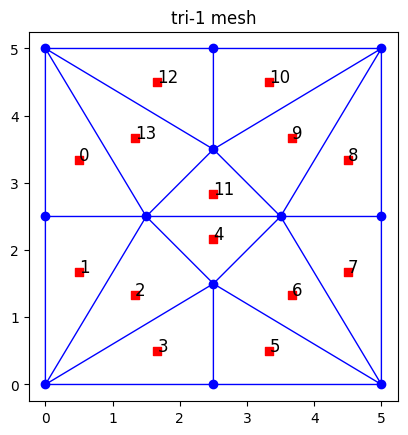

In [5]:
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(points[:,0], points[:,1], cells, 'bo-', lw=1.0)
ax1.set_title('tri-1 mesh')

ax1.scatter(center[:,0], center[:,1], marker='s', color='r')
for i in range(CN):
    ax1.text(center[i,0], center[i,1], str(i), size=12)
plt.show()

## 基于网格构建方稀疏矩阵
### 积分方程代数化(离散化):以Laplacin算子为例

$$
\int_s \Gamma \cdot (\nabla T) ds = 0
$$

$$
\Gamma \sum_{i=1}^3 \mathbf{S_i} \frac{x_P - x_{N_i}}{P-N_i} = 0
$$

化简，假设 $\Gamma$ 为常数（对应常物性问题），则可以删去 $\Gamma$ ，并令
$$
a^P_i =  -\frac{\mathbf{S_i}}{P-N_i}
$$
则有
$$
\sum_{i=1}^3 a^P_i (x_{N_i}-x_p) = 0
$$

再令
$$
a^P_P = \sum_{i=1}^3 -a^P_{N_i}
$$

则有
$$
a^P_P \cdot x_P + a^P_{N_1} \cdot x_{N_1} + a^P_{N_2} \cdot x_{N_2} + a^P_{N_3} \cdot x_{N_3} = 0
$$


### 代数方程矩阵化



对于单元4，其与2，6，11号单元存在交界面

$$
a^4_2 \cdot x_2 + a^4_4 \cdot x_4 + a^4_6 \cdot x_6 + a^4_{11} \cdot x_{11} = 0
$$

或者写为

$$
[a^4_2, a^4_4, a^4_6, a^4_{11}]\cdot 
\left[
\begin{matrix}
x_2\\
x_4\\
x_6\\
x_{11}
\end{matrix}
\right]
= 0
$$


对于单元11，其与4,9,13号单元存在交界面，所以有

$$
[a^{11}_4, a^{11}_9, a^{11}_{11}, a^{11}_{13}]\cdot 
\left[
\begin{matrix}
x_4\\
x_9\\
x_{11}\\
x_{13}
\end{matrix}
\right]
= 0
$$


### 通过矩阵形式合并单元4和单元11的方程

$$
\left[
\begin{matrix}
a^4_2 & a^4_4    & a^4_6 & 0        & a^4_{11}    & 0 \\
0     & a^{11}_4 & 0     & a^{11}_9 & a^{11}_{11} & a^{11}_{13}
\end{matrix}
\right]
\cdot 
\left[
\begin{matrix}
x_2\\
x_4\\
x_6\\
x_9\\
x_{11}\\
x_{13}
\end{matrix}
\right]
=
 \left[
\begin{matrix}
0\\
0
\end{matrix}
\right]
$$

将其余四个内部单元2，6，9，13也添加进去后，矩阵形式变为

$$
\left[
\begin{matrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & a^2_1 & a^2_2 & a^2_3 & a^2_4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & a^4_2 & 0 & a^4_4 & 0 & a^4_6 & 0 & 0 & 0 & 0 & a^4_{11} & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & a^6_4 & a^6_5 & a^6_6 & a^6_7 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a^9_8 & a^9_9 & a^9_{10} & a^9_{11} & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & a^{11}_4 & 0 & 0 & 0 & 0 & a^{11}_9 & 0 & a^{11}_{11} & 0 & a^{11}_{13} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
a^{13}_{0} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a^{13}_{11} & a^{13}_{12} & a^{13}_{13}
\end{matrix}
\right]
\cdot 
\left[
\begin{matrix}
x_0\\
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
x_6\\
x_7\\
x_8\\
x_9\\
x_{10}\\
x_{11}\\
x_{12}\\
x_{13}
\end{matrix}
\right]
=
\left[
\begin{matrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0
\end{matrix}
\right]
$$

观察系数上下标后发现，上下标分别是系数在矩阵中的行、列号，于是可以写为

$$
\left[
\begin{matrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & a_{2,1} & a_{2,2} & a_{2,3} & a_{2,4} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & a_{4,2} & 0 & a_{4,4} & 0 & a_{4,6} & 0 & 0 & 0 & 0 & a_{4,11} & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & a_{6,4} & a_{6,5} & a_{6,6} & a_{6,7} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{9,8} & a_{9,9} & a_{9,10} & a_{9,11} & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & a_{11,4} & 0 & 0 & 0 & 0 & a_{11,9} & 0 & a_{11,11} & 0 & a_{11,13} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
a_{13,0} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{13,11} & a_{13,12} & a_{13,13}
\end{matrix}
\right]
\cdot 
\left[
\begin{matrix}
x_0\\
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
x_6\\
x_7\\
x_8\\
x_9\\
x_{10}\\
x_{11}\\
x_{12}\\
x_{13}
\end{matrix}
\right]
=
\left[
\begin{matrix}
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\
0
\end{matrix}
\right]
$$

### 边界单元处理

对于含有边界面S的控制体0,1,3,5,7,8,10,12这8个边界单元，其在边界上不存在相邻控制体中心点N，此时可以将界面中心点视作N点来近似：

以边界控制体1为例：
$$
a_{0,0} \cdot x_0 + a^P_{0,B_0} \cdot b_{B_0} + a_{0,1} \cdot x_{1} + a_{0,13} \cdot x_{13} = 0
$$
因为边界条件 $b_{B_0}$ 已知，上市移项后有
$$
a_{0,0} \cdot x_0 + a_{0,1} \cdot x_{1} + a_{0,13} \cdot x_{13} = -a^P_{0,B_0} \cdot b_{B_0}
$$
令$b_0 = -a^P_{0,B_0} \cdot b_{B_0}$，则有
$$
a_{0,0} \cdot x_0 + a_{0,1} \cdot x_{1} + a_{0,13} \cdot x_{13} = b_{0}
$$
矩阵形式为
$$
\left[
\begin{matrix}
a_{0,0}, a_{0,1}, a_{0,13}
\end{matrix}
\right]
\cdot 
\left[
\begin{matrix}
x_0\\
x_1\\
x_{13}
\end{matrix}
\right]
= b_0
$$

将边界单元的方程合并到矩阵中

$$
\left[
\begin{matrix}
a_{0,0} & a_{0,1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{0,13} \\
a_{1,0} & a_{1,1} & a_{1,2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & a_{2,1} & a_{2,2} & a_{2,3} & a_{2,4} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & a_{3,2} & a_{3,3} & 0 & a_{3,5} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & a_{4,2} & 0 & a_{4,4} & 0 & a_{4,6} & 0 & 0 & 0 & 0 & a_{4,11} & 0 & 0 \\
0 & 0 & 0 & a_{5,3} & 0 & a_{5,5} & a_{5,6} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & a_{6,4} & a_{6,5} & a_{6,6} & a_{6,7} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & a_{7,6} & a_{7,7} & a_{7,8} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{8,7} & a_{8,8} & a_{8,9} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{9,8} & a_{9,9} & a_{9,10} & a_{9,11} & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{10,9} & a_{10,10} & 0 & a_{10,12} & 0 \\
0 & 0 & 0 & 0 & a_{11,4} & 0 & 0 & 0 & 0 & a_{11,9} & 0 & a_{11,11} & 0 & a_{11,13} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{12,10} & 0 & a_{12,12} & a_{12,13} \\
a_{13,0} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & a_{13,11} & a_{13,12} & a_{13,13}
\end{matrix}
\right]
\cdot 
\left[
\begin{matrix}
x_0\\
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
x_6\\
x_7\\
x_8\\
x_9\\
x_{10}\\
x_{11}\\
x_{12}\\
x_{13}
\end{matrix}
\right]
=
\left[
\begin{matrix}
b_{0}\\
b_{1}\\
0\\
b_{3}\\
0\\
b_{5}\\
0\\
b_{7}\\
b_{8}\\
0\\
b_{10}\\
0\\
b_{12}\\
0
\end{matrix}
\right]
$$

于是得到一个对称稀疏矩阵和一个与控制体（cell）数量相等的列向量